# 数据集



HCL2000

北京邮电大学模式识别实验室发布的数据。HCL2000是目前最大的脱机手写汉字库，共有1000个人书写，700个训练集，300个测试集。

由于电脑性能原因，只取前300个字符，测试集每类字符100张图片，训练集每类字符100张图片

# 整理数据


In [20]:
import os
import shutil
import re

path = 'f:/HCL2000'

sort_folder_number = [x for x in range(0,100)]
for number in sort_folder_number:
    new_folder_path = os.path.join('f:/mytest/test','%s'%number)
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)


In [21]:
#列出文档
file_list = os.listdir(path)
#提取出文档名称内的数字，并根据数字决定将问价发往那个文件夹
for i in range(len(file_list)):
    old_file_path = os.path.join(path,file_list[i])
    if os.path.isdir(old_file_path):
        pass
    elif not os.path.exists(old_file_path):
        pass
    else:
        file_name_number = os.path.splitext(old_file_path)[0]
        file_name_number = int(file_name_number.split('_')[1])
                           
        new_file_path = os.path.join('f:/mytest/test','%s'%file_name_number)
        shutil.move(old_file_path,new_file_path)

# 图片展示

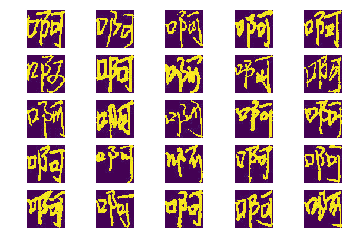

In [6]:
%matplotlib inline

import os  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg

some_old_pics = os.listdir('f:/mytest/train/0')  
show_rows = show_columns = 5  
for k in range(show_rows * show_rows):  
    image = mpimg.imread('f:/mytest/train/0/%s' % some_old_pics[k])
    plt.subplot(show_rows, show_rows, k+1)
    plt.imshow(image)
    plt.axis('off')

# 数据增强示例


In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='constant')

img = load_img('f:/mytest/train/0/hh600_1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='f:/mytest', save_prefix='a', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
        

# 训练CNN网络


In [1]:
from keras.preprocessing.image import ImageDataGenerator  
from keras.models import Sequential  
from keras.layers import Conv2D, MaxPooling2D  
from keras.layers import Activation, Dropout, Flatten, Dense  
from keras.models import Model,Input,load_model
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard  


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 参数定义

In [2]:
img_width, img_height = 64, 64

train_data_dir = 'f:/mytest/train'  
validation_data_dir = 'f:/mytest/validation'  
nb_train_samples = 10900  
nb_validation_samples = 5100
epochs = 12
batch_size = 32
num_classes = 100
input_shape = (img_width, img_height, 3) 

# 数据增强

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='constant')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    )

Found 10900 images belonging to 100 classes.
Found 5100 images belonging to 100 classes.


# cnn模型1

In [4]:
#model1
def cnn(input,output):

    model= Sequential()
    model.add(Conv2D(64, (3, 3), padding='same',input_shape=input ))   
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(output, activation='softmax'))  
    return model

cnn_model = cnn(input_shape,num_classes)
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#              metrics=['accuracy'])


In [ ]:
filepath="f:/mytest/weights/model01.weights-improvement-{epoch:02d}-{val_acc:.2f}.h5"  
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')  
tensorboard = TensorBoard(log_dir='f:/mytest/logs', histogram_freq=0)  
callbacks_list = [checkpoint, tensorboard]

model01 = model.fit_generator(  
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
   epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list)

with open('f:/mytest/log_adm_cha_modell01.txt','w') as f:
    f.write(str(model01.history))

In [ ]:
import os  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg

plt.plot(model01.history['acc'])

# 验证模型


In [15]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
best_model = load_model('f:/mytest/weights/model01.weights-improvement-20-0.95.h5')
#besy_model = load.model(2.weights-improvement-10-0.91)

datagen = ImageDataGenerator( )

test_generator = datagen.flow_from_directory(
  'f:/mytest/test',
  target_size=(img_width, img_height),
    batch_size=batch_size)



OSError: Unable to open file (unable to open file: name = 'f:/mytest/weights/model01.weights-improvement-20-0.95.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
scores = best_model.evaluate_generator(test_generator)
print(scores)

# CNN模型2

In [9]:
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2

def new_cnn(input_shape=(64, 64, 3), output_shape=100):

    model = Sequential()
    model.add(Conv2D(50, (3, 3) ,padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Conv2D(100 ,(3, 3), padding= 'same'))
    model.add(LeakyReLU(alpha=0.3))    
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

    model.add(Conv2D(150,(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.3))
        #model.add(Activation(LeakyReLU(alpha=0.33)))
    model.add(Dropout(0.1))
    model.add(Conv2D(200, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

    #model.add(Conv2D(250,(3, 3), padding='same'))
    #model.add(LeakyReLU(alpha=0.3))
    #.add(Dropout(0.2))
    #model.add(Conv2D(300, (3, 3), padding='same'))
    #model.add(LeakyReLU(alpha=0.3))#model.add(Activation(LeakyReLU(alpha=0.33)))
    #.add(Dropout(0.3))
    #model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

    #model.add(Convolution2D(350, 3, 3, border_mode='same', W_regularizer=l2(0.0005)))
    #model.add(Activation(LeakyReLU(alpha=0.33)))
    #model.add(Dropout(0.3))
    #model.add(Convolution2D(400, 3, 3, border_mode='same', W_regularizer=l2(0.0005)))
    #model.add(Activation(LeakyReLU(alpha=0.33)))
    #model.add(Dropout(0.4))
    #model.add(MaxPooling2D(pool_size=(2,2), border_mode='same'))

    model.add(Flatten())
    model.add(Dense(300))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(0.2))
    #model.add(Dense(200))
    #model.add(Activation(LeakyReLU(alpha=0.33)))

    model.add(Dense(output_shape))
    model.add(Activation('softmax'))
    return model


In [5]:
new_model =  new_cnn()
new_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

filepath="f:/mytest/weights/model02.weights-improvement-{epoch:02d}-{val_acc:.2f}.h5"  
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')  
tensorboard = TensorBoard(log_dir='f:/mytest/logs', histogram_freq=0)  
callbacks_list = [checkpoint, tensorboard]

model02 = new_model.fit_generator(  
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list)

with open('f:/mytest/log_adm_cha_modell02.txt','w') as f:
    f.write(str(model02.history))

Epoch 1/20
340/340 [==============================] - 3063s 9s/step - loss: 4.3636 - acc: 0.0493 - val_loss: 3.0774 - val_acc: 0.2335

Epoch 00001: val_acc improved from -inf to 0.23349, saving model to f:/mytest/weights/model02.weights-improvement-01-0.23.h5
Epoch 2/20
340/340 [==============================] - 2988s 9s/step - loss: 3.3918 - acc: 0.1985 - val_loss: 1.6361 - val_acc: 0.5311

Epoch 00002: val_acc improved from 0.23349 to 0.53105, saving model to f:/mytest/weights/model02.weights-improvement-02-0.53.h5
Epoch 3/20
340/340 [==============================] - 3183s 9s/step - loss: 2.7952 - acc: 0.3083 - val_loss: 1.3306 - val_acc: 0.6124

Epoch 00003: val_acc improved from 0.53105 to 0.61242, saving model to f:/mytest/weights/model02.weights-improvement-03-0.61.h5
Epoch 4/20
340/340 [==============================] - 2977s 9s/step - loss: 2.4100 - acc: 0.3818 - val_loss: 1.1266 - val_acc: 0.6706

Epoch 00004: val_acc improved from 0.61242 to 0.67060, saving model to f:/mytes

KeyboardInterrupt: 

In [8]:
import os  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
# summarize history for accuracy
plt.plot(model02.history['acc'])
plt.plot(model02.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.savefig('f:/mytest/accuracyVSepoch.png')
plt.show()
# summarize history for loss
plt.plot(model02.history['loss'])
plt.plot(model02.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.savefig('f:/mytest/lossVSepoch.png')
plt.show()

NameError: name 'model02' is not defined

In [17]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
best_model = load_model('f:/mytest/weights/model02.weights-improvement-11-0.82.h5')
#besy_model = load.model(2.weights-improvement-10-0.91)

datagen = ImageDataGenerator( )

test_generator = datagen.flow_from_directory(
  'f:/mytest/test',
  target_size=(img_width, img_height),batch_size=
    batch_size)



Found 5049 images belonging to 100 classes.


In [ ]:
scores = best_model.evaluate_generator(test_generator)
print(scores)

# 集成模型


In [11]:
new_model =  new_cnn()
cnn_model.load_weights('f:/mytest/2.weights-improvement-10-0.91.h5')
new_model.load_weights('f:/mytest/weights/model02.weights-improvement-05-0.74.h5')

models = [cnn_model,new_model]


In [13]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Average, Dropout
def ensemble(models):
    
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(y, name='ensemble')
    
    return y
ensemble_model = ensemble(models)

datagen = ImageDataGenerator( )

test_generator = datagen.flow_from_directory(
  'f:/mytest/test',
  target_size=(img_width, img_height),
    batch_size=batch_size)
scores = ensemble_model.evaluate_generator(test_generator)
print(scores)

Found 5049 images belonging to 100 classes.


AttributeError: 'Tensor' object has no attribute 'evaluate_generator'

In [ ]:
evaluate_error（ensemble_model）